In [50]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [51]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)


In [52]:
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [53]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [54]:
df_jobs.merge(df_companies, on='company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [55]:
df_GE = df[df['job_country'] == 'Germany'].copy()
df_GE['job_posted_month'] = df_GE['job_posted_date'].dt.strftime('%B')

In [56]:
df_GE_pivot = df_GE.pivot_table(
    index='job_posted_month',
    columns='job_title_short',
    aggfunc='size'
)
df_GE_pivot.reset_index(inplace=True)

In [57]:
df_GE_pivot['month_no'] = pd.to_datetime(df_GE_pivot['job_posted_month'], format='%B').dt.month
df_GE_pivot.sort_values('month_no', inplace=True)
df_GE_pivot.set_index('job_posted_month', inplace=True)
df_GE_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
job_posted_month,,,,,,,,,,,
January,46,11,596,622,759,39,128,239,205,52,1
February,49,11,593,571,611,35,131,199,171,60,2
March,43,3,582,511,529,18,86,199,157,42,3
April,47,13,454,432,520,17,93,190,146,20,4
May,45,7,430,364,351,16,81,123,111,29,5
June,31,7,558,434,430,22,92,137,138,30,6
July,46,7,545,474,438,25,105,143,125,50,7
August,28,9,489,399,407,30,86,145,141,48,8
September,106,24,656,668,583,41,126,178,137,66,9


In [58]:
import random

# Set seed for reproducibility
random.seed(42)

# Define job titles
job_titles = ['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer', 'UI/UX Designer']

# Define months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define ranges for random data
ranges = {
    'Front-End Developer': (11000, 15000),
    'Back-End Developer': (8000, 10000),
    'Full-Stack Developer': (5000, 7500),
    'UI/UX Designer': (4000, 5000)
}

# Generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# Create DataFrame
df_US_software_pivot = pd.DataFrame(data, index=months)
df_US_software_pivot.index.name = "job_posted_month"

df_US_software_pivot


,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [61]:
df_GEUS_merged = df_GE_pivot.merge(df_US_software_pivot, on="job_posted_month").drop(columns='month_no')

In [67]:
top_5 = (df_GEUS_merged
.sum()
.sort_values(ascending=False)
.head(5)
.index.to_list()
)
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Analyst']

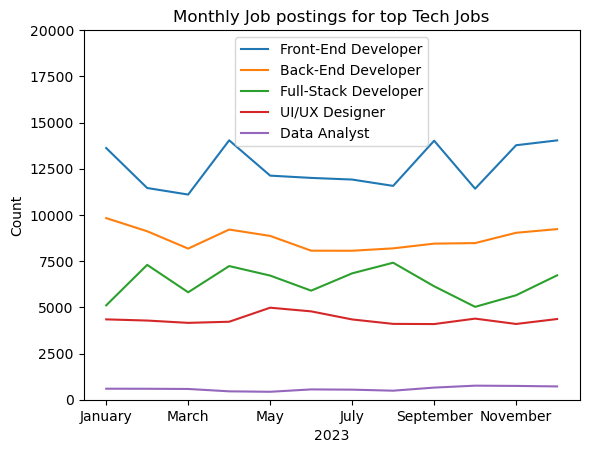

In [79]:
df_GEUS_merged[top_5].plot(kind='line')
plt.title('Monthly Job postings for top Tech Jobs')
plt.xlabel('2023')
plt.ylabel('Count')
plt.ylim(0,20000)
plt.legend()

plt.show()